In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report,auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("ParisHousingClass.csv")
data

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9,Basic
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0,Basic
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5,Basic
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0,Basic


In [3]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data["category"] = encoder.fit_transform(data["category"])

In [4]:
X = data.drop(columns=["category","hasYard","hasPool","isNewBuilt","hasStormProtector","hasStorageRoom"])
y = data["category"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Define the Classification model
model_l1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_l1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                832       
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3457 (13.50 KB)
Trainable params: 3457 (13.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model_l1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history = model_l1.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test))

Epoch 1/100


250/250 [==============================] - 5s 9ms/step - loss: 0.3973 - accuracy: 0.8724 - val_loss: 0.3861 - val_accuracy: 0.8735
Epoch 2/100
250/250 [==============================] - 1s 6ms/step - loss: 0.3823 - accuracy: 0.8735 - val_loss: 0.3836 - val_accuracy: 0.8735
Epoch 3/100
250/250 [==============================] - 1s 6ms/step - loss: 0.3799 - accuracy: 0.8735 - val_loss: 0.3833 - val_accuracy: 0.8735
Epoch 4/100
250/250 [==============================] - 1s 6ms/step - loss: 0.3769 - accuracy: 0.8735 - val_loss: 0.3854 - val_accuracy: 0.8735
Epoch 5/100
250/250 [==============================] - 1s 6ms/step - loss: 0.3742 - accuracy: 0.8735 - val_loss: 0.3853 - val_accuracy: 0.8735
Epoch 6/100
250/250 [==============================] - 1s 6ms/step - loss: 0.3728 - accuracy: 0.8735 - val_loss: 0.3840 - val_accuracy: 0.8735
Epoch 7/100
250/250 [==============================] - 1s 6ms/step - loss: 0.3701 - accuracy: 0.8735 - val_loss: 0.3841 - val_accuracy: 0.87

Epoch 55/100
250/250 [==============================] - 2s 6ms/step - loss: 0.2403 - accuracy: 0.9024 - val_loss: 0.5589 - val_accuracy: 0.8225
Epoch 56/100
250/250 [==============================] - 1s 6ms/step - loss: 0.2382 - accuracy: 0.9028 - val_loss: 0.5638 - val_accuracy: 0.8285
Epoch 57/100
250/250 [==============================] - 2s 6ms/step - loss: 0.2384 - accuracy: 0.9038 - val_loss: 0.5707 - val_accuracy: 0.8245
Epoch 58/100
250/250 [==============================] - 2s 6ms/step - loss: 0.2354 - accuracy: 0.9039 - val_loss: 0.5714 - val_accuracy: 0.8335
Epoch 59/100
250/250 [==============================] - 2s 6ms/step - loss: 0.2322 - accuracy: 0.9062 - val_loss: 0.5810 - val_accuracy: 0.8405
Epoch 60/100
250/250 [==============================] - 2s 7ms/step - loss: 0.2319 - accuracy: 0.9081 - val_loss: 0.5886 - val_accuracy: 0.8460
Epoch 61/100
250/250 [==============================] - 2s 6ms/step - loss: 0.2280 - accuracy: 0.9082 - val_loss: 0.5807 - val_accuracy:

In [99]:
loss, accuracy = model_l1.evaluate(X_test_scaled, y_test)
print("Classification Loss:", loss)
print("Classification Accuracy:", accuracy)

63/63 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.8080
Classification Loss: 0.6760655045509338
Classification Accuracy: 0.8080000281333923


63/63 [==============================] - 0s 1ms/step


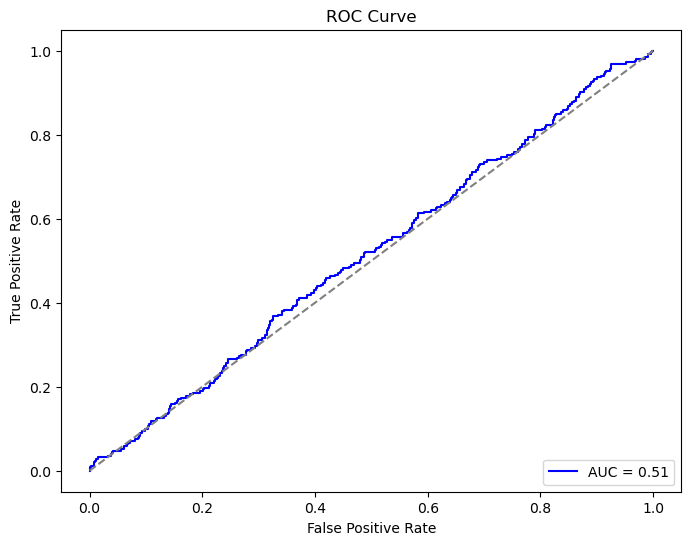

In [100]:
y_pred_prob = model_l1.predict(X_test_scaled).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr,'b', label = 'AUC = %0.2f' % auc(fpr, tpr))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1747
           1       0.11      0.08      0.09       253

    accuracy                           0.81      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.78      0.81      0.79      2000



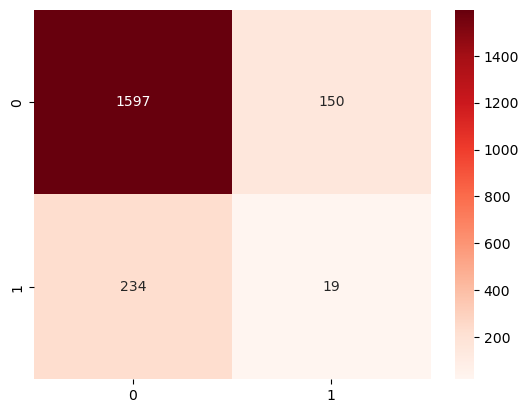

In [101]:
y_pred = np.round(y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, cmap="Reds", annot=True, fmt="g")

print("Classification Report:")
print(classification_report(y_test, y_pred))

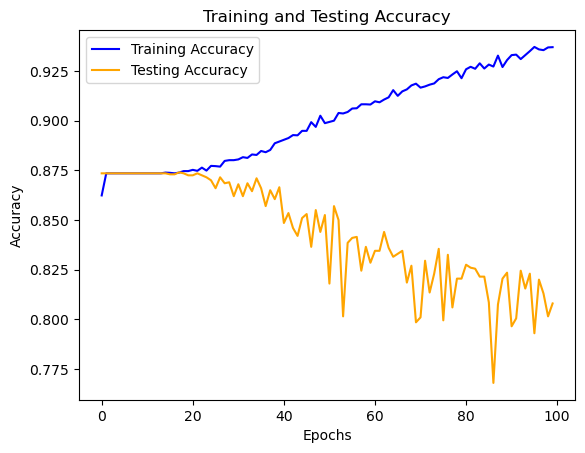

In [107]:
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy', color='orange')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

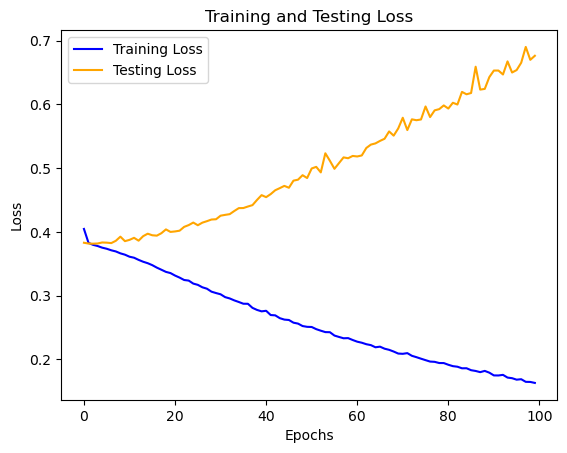

In [105]:
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Testing Loss', color='orange')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()